In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [92]:
sns.set_style('darkgrid')

In [93]:
df= pd.read_csv('players_20.csv')

In [94]:
pd.set_option("display.max_columns", None)
df.sample(3)

sofifa_id                                         player_url  \
580       216388  https://sofifa.com/player/216388/allan-saint-m...   
14308     203430  https://sofifa.com/player/203430/george-ray/20...   
2351      200759  https://sofifa.com/player/200759/jeffrey-schlu...   

             short_name            long_name  age         dob  height_cm  \
580    A. Saint-Maximin  Allan Saint-Maximin   22  1997-03-12        173   
14308            G. Ray           George Ray   25  1993-10-13        193   
2351         J. Schlupp      Jeffrey Schlupp   26  1992-12-23        178   

       weight_kg nationality              club  overall  potential  value_eur  \
580           67      France  Newcastle United       79         86   17500000   
14308         71       Wales   Tranmere Rovers       61         68     325000   
2351          72       Ghana    Crystal Palace       74         75    6500000   

       wage_eur player_positions preferred_foot  international_reputation  \
580       45000       RW, LW, ST          Right                         2   
14308      2000               CB          Right                         1   
2351      43000       LM, CM, LB           Left                         1   

       weak_foot  skill_moves      work_rate body_type real_face  \
580            4            5       High/Low    Normal        No   
14308          2            2  Medium/Medium      Lean        No   
2351           2            3    High/Medium    Normal       Yes   

       release_clause_eur                      player_tags team_position  \
580            36800000.0  #Speedster, #Dribbler, #Acrobat           SUB   
14308            634000.0                              NaN           RCB   
2351           12800000.0                              NaN           SUB   

       team_jersey_number loaned_from      joined  contract_valid_until  \
580                  10.0         NaN  2019-08-02                2025.0   
14308                 5.0         NaN  2019-07-01                2021.0   
2351                 15.0         NaN  2017-01-13                2021.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
580               NaN                   NaN  93.0      70.0     70.0   
14308             NaN                   NaN  62.0      17.0     25.0   
2351              NaN                   NaN  86.0      67.0     66.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
580         87.0       23.0    63.0        NaN          NaN         NaN   
14308       51.0       60.0    69.0        NaN          NaN         NaN   
2351        73.0       69.0    75.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning  \
580            NaN       NaN             NaN   
14308          NaN       NaN             NaN   
2351           NaN       NaN             NaN   

                                           player_traits  attacking_crossing  \
580    Injury Free, Selfish, Early Crosser, Crowd Fav...                  66   
14308                                                NaN                  15   
2351                                       Early Crosser                  69   

       attacking_finishing  attacking_heading_accuracy  \
580                     69                          53   
14308                   15                          62   
2351                    64                          64   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
580                         75                 59               90   
14308                       35                 18               49   
2351                        72                 64               74   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
580             70                 46                  72                  81   
14308           16                 12                  33                  47   
2351            62                 34      

In [95]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display

In [96]:
df.shape

(18278, 104)

In [97]:
# filtering out early on columns which would be irrelevant for this project
irrelvant_cols=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'body_type', 'player_tags','loaned_from', 'joined',
                'team_jersey_number', 'nation_jersey_number', 'contract_valid_until', 'player_traits']

In [98]:
fifa= df.drop(irrelvant_cols, axis=1)

In [99]:
fifa.shape

(18278, 91)

### Checking duplicates

In [100]:
fifa.duplicated().sum()

0

There are no duplicated records in the dataset

### Columns as per datatypes

In [101]:
integer_columns = fifa.select_dtypes(include=['int64']).columns
float_columns = fifa.select_dtypes(include=['float64']).columns
object_columns = fifa.select_dtypes(include=['object']).columns

In [102]:
print(' int64 columns:\n',integer_columns)
print('=========================================================================================================')
print(' float64 columns:\n',float_columns)
print('=========================================================================================================')
print(' object columns:\n',object_columns)

 int64 columns:
 Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'

## Dealing with Missing Values

In [103]:
gk_attribute_cols= ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [104]:
fifa[gk_attribute_cols]=fifa[gk_attribute_cols].fillna(0)

In [105]:
fifa[fifa['team_position']=='GK'].head(3)

short_name  age  height_cm  weight_kg nationality             club  \
3        J. Oblak   26        188         87    Slovenia  Atlético Madrid   
6   M. ter Stegen   27        187         85     Germany     FC Barcelona   
13        Alisson   26        191         91      Brazil        Liverpool   

    overall  potential  value_eur  wage_eur player_positions preferred_foot  \
3        91         93   77500000    125000               GK          Right   
6        90         93   67500000    250000               GK          Right   
13       89         91   58000000    155000               GK          Right   

    international_reputation  weak_foot  skill_moves      work_rate  \
3                          3          3            1  Medium/Medium   
6                          3          4            1  Medium/Medium   
13                         3          3            1  Medium/Medium   

    release_clause_eur team_position nation_position  pace  shooting  passing  \
3          164700000.0            GK              GK   NaN       NaN      NaN   
6          143400000.0            GK             SUB   NaN       NaN      NaN   
13         111700000.0            GK             NaN   NaN       NaN      NaN   

    dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
3         NaN        NaN     NaN       87.0         92.0        78.0   
6         NaN        NaN     NaN       88.0         85.0        88.0   
13        NaN        NaN     NaN       85.0         84.0        85.0   

    gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
3          89.0      52.0            90.0                  13   
6          90.0      45.0            88.0                  18   
13         89.0      51.0            90.0                  17   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
3                    11                          15                       43   
6                    14                          11                       61   
13                   13                          19                       45   

    attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
3                  13               12           13                 14   
6                  14               21           18                 12   
13                 20               27           19                 18   

    skill_long_passing  skill_ball_control  movement_acceleration  \
3                   40                  30                     43   
6                   63                  30                     38   
13                  44                  30                     56   

    movement_sprint_speed  movement_agility  movement_reactions  \
3                      60                67                  88   
6                      50                37                  86   
13                     47                40                  88   

    movement_balance  power_shot_power  power_jumping  power_stamina  \
3                 49                59             78             41   
6                 43                66             79             35   
13                37                64             52             32   

    power_strength  power_long_shots  mentality_aggression  \
3               78                12                    34   
6               78                10                    43   
13              78                14                    27   

    mentality_interceptions  mentality_positioning  mentality_vision  \
3                        19                     11                65   
6                        22                     11                70   
13                       11                     13                66   

    mentality_penalties  mentality_composure  defending_marking  \
3                    11                   68                 27   
6                    25                   70                 25   
13                   23      

In [106]:
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in fifa.index:
    if 'GK' in fifa.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(fifa.loc[index, col]):
                fifa.loc[index, col]=0

In [107]:
fifa[fifa['team_position']=='GK'].head()

short_name  age  height_cm  weight_kg nationality               club  \
3        J. Oblak   26        188         87    Slovenia    Atlético Madrid   
6   M. ter Stegen   27        187         85     Germany       FC Barcelona   
13        Alisson   26        191         91      Brazil          Liverpool   
14         De Gea   28        192         82       Spain  Manchester United   
25        Ederson   25        188         86      Brazil    Manchester City   

    overall  potential  value_eur  wage_eur player_positions preferred_foot  \
3        91         93   77500000    125000               GK          Right   
6        90         93   67500000    250000               GK          Right   
13       89         91   58000000    155000               GK          Right   
14       89         90   56000000    205000               GK          Right   
25       88         91   54500000    185000               GK           Left   

    international_reputation  weak_foot  skill_moves      work_rate  \
3                          3          3            1  Medium/Medium   
6                          3          4            1  Medium/Medium   
13                         3          3            1  Medium/Medium   
14                         4          3            1  Medium/Medium   
25                         2          3            1  Medium/Medium   

    release_clause_eur team_position nation_position  pace  shooting  passing  \
3          164700000.0            GK              GK   0.0       0.0      0.0   
6          143400000.0            GK             SUB   0.0       0.0      0.0   
13         111700000.0            GK             NaN   0.0       0.0      0.0   
14         110600000.0            GK              GK   0.0       0.0      0.0   
25         104900000.0            GK             NaN   0.0       0.0      0.0   

    dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
3         0.0        0.0     0.0       87.0         92.0        78.0   
6         0.0        0.0     0.0       88.0         85.0        88.0   
13        0.0        0.0     0.0       85.0         84.0        85.0   
14        0.0        0.0     0.0       90.0         84.0        81.0   
25        0.0        0.0     0.0       86.0         82.0        93.0   

    gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
3          89.0      52.0            90.0                  13   
6          90.0      45.0            88.0                  18   
13         89.0      51.0            90.0                  17   
14         92.0      58.0            85.0                  17   
25         88.0      63.0            86.0                  20   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
3                    11                          15                       43   
6                    14                          11                       61   
13                   13                          19                       45   
14                   13                          21                       50   
25                   14                          14                       56   

    attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
3                  13               12           13                 14   
6                  14               21           18                 12   
13                 20               27           19                 18   
14                 13               18           21                 19   
25                 18               23           15                 20   

    skill_long_passing  skill_ball_control  movement_acceleration  \
3                   40                  30                     43   
6                   63                  30                     38   
13                  44                  30                     56   
14                  47                  38                     57   
25                  58                  40      

In [108]:
import missingno as msno

<AxesSubplot:>

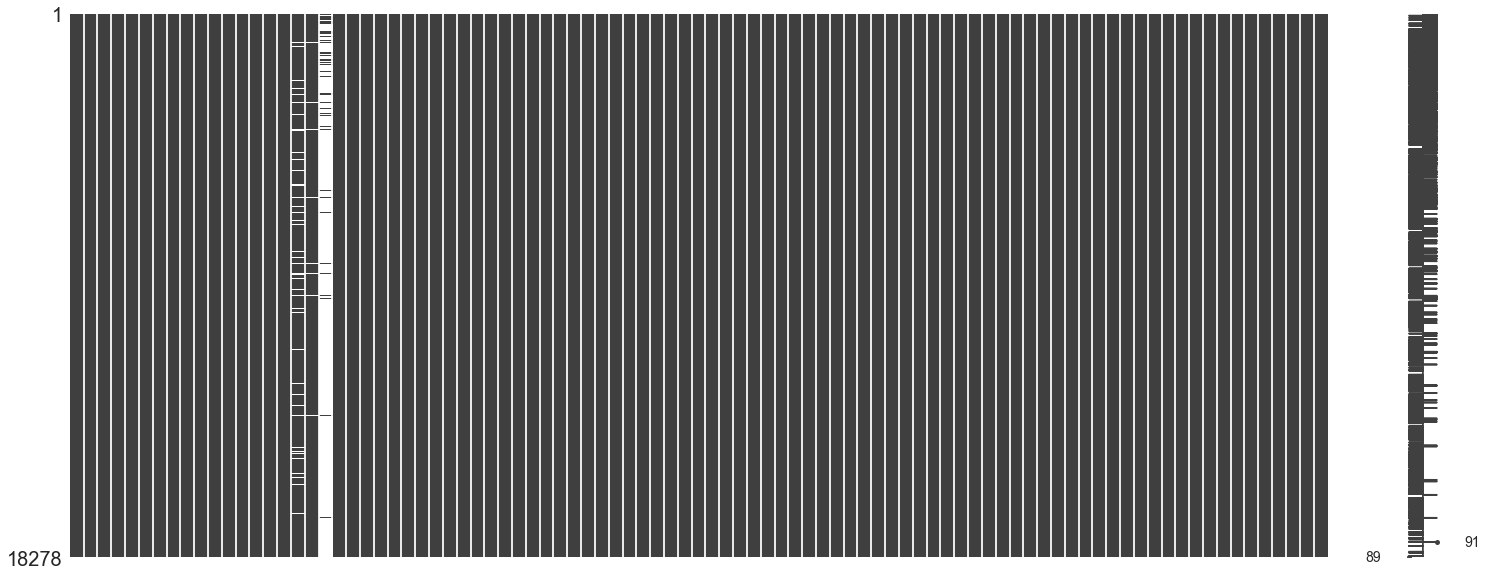

In [109]:
msno.matrix(fifa)

In [110]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]*100

nation_position       93.839589
release_clause_eur     7.101433
team_position          1.313054
short_name             0.000000
goalkeeping_diving     0.000000
                        ...    
gk_positioning         0.000000
gk_speed               0.000000
gk_reflexes            0.000000
gk_kicking             0.000000
rb                     0.000000
Length: 91, dtype: float64

In [111]:
# deleting column 'nation_position'

fifa.drop('nation_position', axis=1, inplace=True)

We will replace missing values in team_position column by 'Not Given'

In [112]:
fifa['team_position']=fifa['team_position'].fillna('Not Given')

In [113]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]

release_clause_eur          0.071014
short_name                  0.000000
defending_sliding_tackle    0.000000
rs                          0.000000
st                          0.000000
                              ...   
gk_positioning              0.000000
gk_speed                    0.000000
gk_reflexes                 0.000000
gk_kicking                  0.000000
rb                          0.000000
Length: 90, dtype: float64

Now only one column is remained with the missing value. We do not want to directly drop the row as we could loose data on some important players. So let us wait for the EDA part and impute the missing value

### Curating datatype

If we look at the last 26 columns, they represent positional attributes of the players. But they are given in string format. We will round off these attribute to nearest integer. To perform this action, we will create a function str_to_int which will transform the string to nearest interger

In [114]:
fifa.iloc[:3,64:]

ls    st    rs    lw    lf    cf    rf    rw   lam   cam   ram    lm  \
0  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2   
1  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3   
2  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3   

    lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb  \
0  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2   
1  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3   
2  82+3  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3   

    rcb    rb  
0  52+2  63+2  
1  53+3  61+3  
2  46+3  61+3

In [115]:
def str_to_int(x):
   new= int(str(x).split('+')[0]) 

   return new

In [116]:
# columns to change the datatypes
columns= ['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in columns:
    fifa[col]=fifa[col].apply(str_to_int)

fifa.head(3)

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   

   skill_moves    work_rate  release_clause_eur team_position  pace  shooting  \
0            4   Medium/Low         195800000.0            RW  87.0      92.0   
1            5     High/Low          96500000.0            LW  90.0      93.0   
2            5  High/Medium         195200000.0           CAM  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     92.0       96.0       39.0    66.0        0.0          0.0         0.0   
1     82.0       89.0       35.0    78.0        0.0          0.0         0.0   
2     87.0       95.0       32.0    58.0        0.0          0.0         0.0   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0          0.0       0.0             0.0                  88   
1          0.0       0.0             0.0                  84   
2          0.0       0.0             0.0                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goal

# Functions

In [117]:
def get_player_image(url):
    #url = df.loc[0, 'player_url']

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    player_div = soup.find('div', {'class': 'bp3-card player'})
    img_tag = player_div.find('img')
    img_url = img_tag['data-srcset'].split('2x')[0].strip()

    return img_url

In [118]:
def plot_images(player_list, subplot_row, subplot_col, fig_size_tuple):

    fig, ax=plt.subplots(subplot_row,subplot_col, figsize=fig_size_tuple)

    for name, ax in zip(player_list, ax.flatten()):
        mask = df['short_name'] == name
        player_url = df.loc[mask, 'player_url'].values[0]
        
        img_url= get_player_image(player_url)
        
        image_response = requests.get(img_url, stream=True)

        img = Image.open(image_response.raw)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(name, fontsize=15, fontweight='bold');
    plt.tight_layout()

# Exploratory Data Analysis

## Univariate Analysis

### Height, Weight and Age Distribution

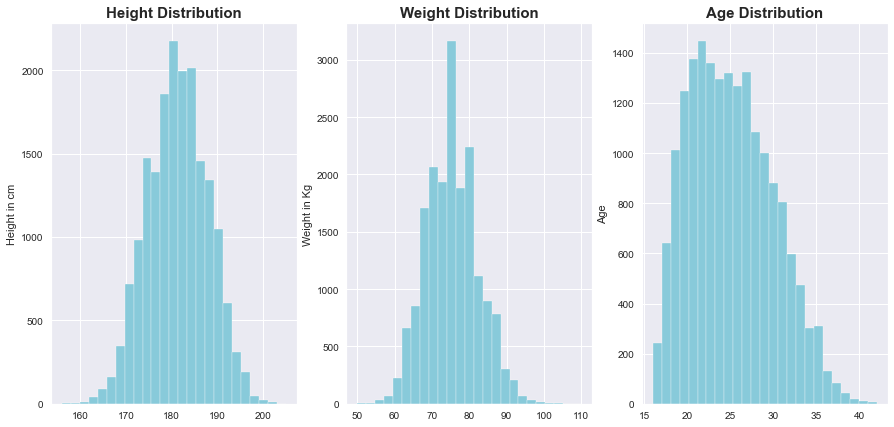

In [119]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(fifa['height_cm'], bins=25, color='c')
plt.ylabel('Height in cm')
plt.title('Height Distribution'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,3,2)
plt.hist(fifa['weight_kg'], bins=25, color='c')
plt.ylabel('Weight in Kg')
plt.title('Weight Distribution'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,3,3)
plt.hist(fifa['age'], bins=25, color='c')
plt.ylabel('Age')
plt.title('Age Distribution'.title(), fontsize=15, fontweight="bold");

- Both attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

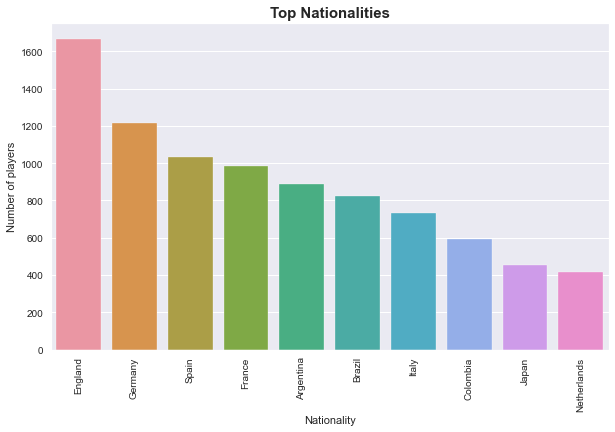

In [120]:
top_nationalities=fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(top_nationalities.keys(), top_nationalities)
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15, fontweight="bold");

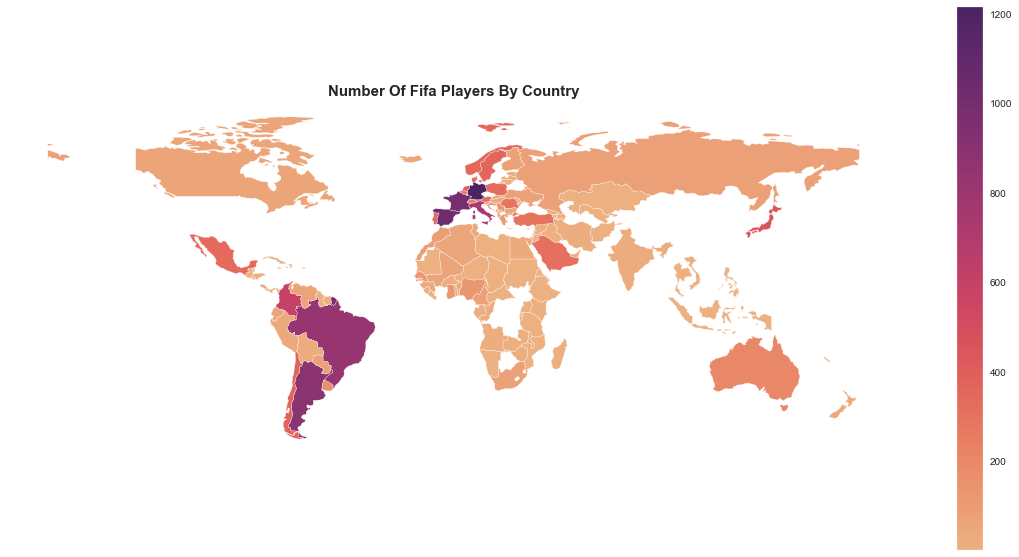

In [121]:
import geopandas as gpd

nationality_counts = fifa.groupby('nationality').size().reset_index(name='count')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(nationality_counts, left_on='name', right_on='nationality')

# plot the choropleth map
fig, ax = plt.subplots(figsize=(20, 10))
merged.plot(column='count', cmap='flare', ax=ax, legend=True)
ax.set_title('Number of FIFA Players by Country'.title(), fontsize=15, fontweight="bold")
ax.set_axis_off()
plt.show()


- England has the highest percentage of players in the dataset at 9.12%.
- The top 10 nationalities together account for more than 45% of the players in the dataset, indicating a concentration of players from a relatively small number of countries.
- European countries dominate the top 10, with six of them being from Europe.
- South American countries are also well represented in the top 10, with Argentina and Brazil being in the top 5.
- Japan is the only Asian country in the top 10, indicating a relatively smaller presence of players from Asia in the dataset.
- The differences in percentages between the top 10 countries are relatively small, with the highest percentage (England) being only about 6 percentage points higher than the 10th highest percentage (Netherlands). This suggests a relatively even distribution of players across the top 10 countries in the dataset.

### Value, Wage and Release Clause of Players

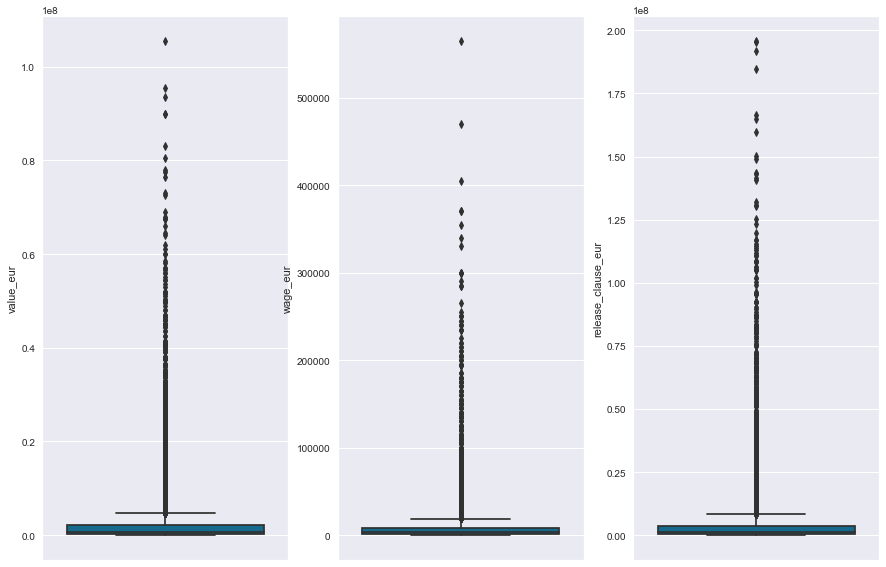

In [122]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y='value_eur',data=fifa)

plt.subplot(1,3,2)
sns.boxplot(y='wage_eur',data=fifa)

plt.subplot(1,3,3)
sns.boxplot(y='release_clause_eur',data=fifa);

- There are players who have zero market value, wage, and/or release clause.
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

### Preferred Foot

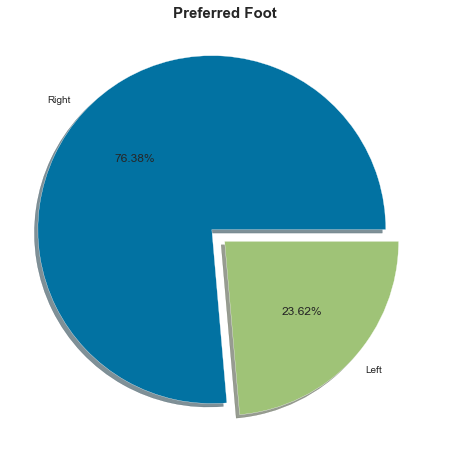

In [123]:
foot=fifa.preferred_foot.value_counts()
plt.figure(figsize=(8,8))
plt.pie(foot, labels=foot.keys(), autopct='%.2f%%', explode=[0.1,0], shadow=True)
plt.title('Preferred foot'.title(), fontsize=15, fontweight="bold");

- The majority of players in the FIFA dataset have a preferred foot of Right, with a count of 13960.
- The number of players with a preferred foot of Left is much smaller, with a count of only 4318 which is equivalent to 23.62% of the total players.
- This suggests that the majority of football players are more comfortable playing with their right foot, which could be due to a variety of factors such as being naturally right-footed or receiving more training and practice on their right side.

### Overall and Potential Attributes

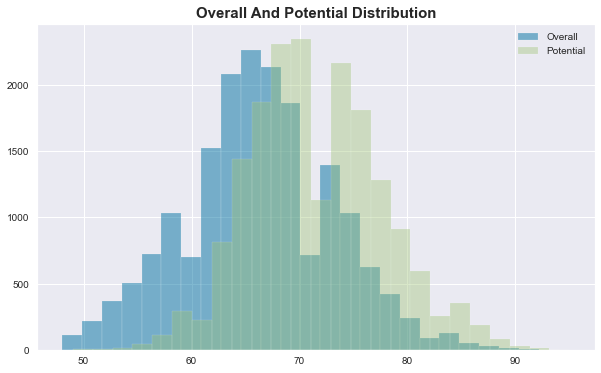

In [124]:
plt.figure(figsize=(10,6))
plt.hist(fifa['overall'], bins=25, alpha=0.5, label='Overall')
plt.hist(fifa['potential'], bins=25, alpha=0.4, label='Potential')
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15, fontweight="bold");

- Potential attribute is distributed on the right side as compared to Overall attributes. This suggests that many plates are players are yet to level thier potential.
- Overall attribute is gathered more between 60 to 70, whereas, most of the players have potential to be between 65 to 75.

## Bivariate Analysis

### Heights vs Weights

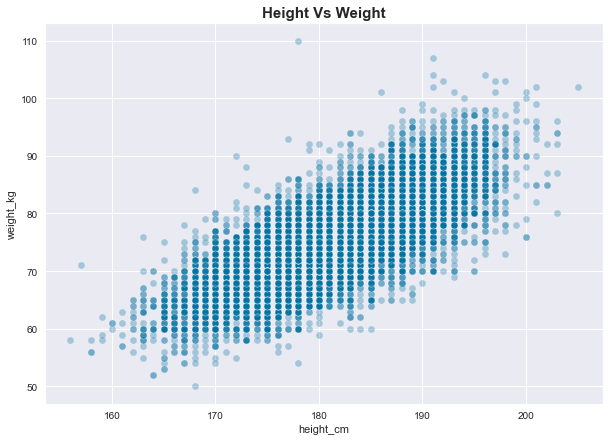

In [125]:
plt.figure(figsize=(10,7))
sns.scatterplot('height_cm', 'weight_kg', data=fifa, alpha=0.3)
plt.title('Height vs Weight'.title(), fontsize=15, fontweight="bold");

Players weights are positively correlated with their heights. In other words, players with more heights tend to have more weights.

### Age vs other attributes

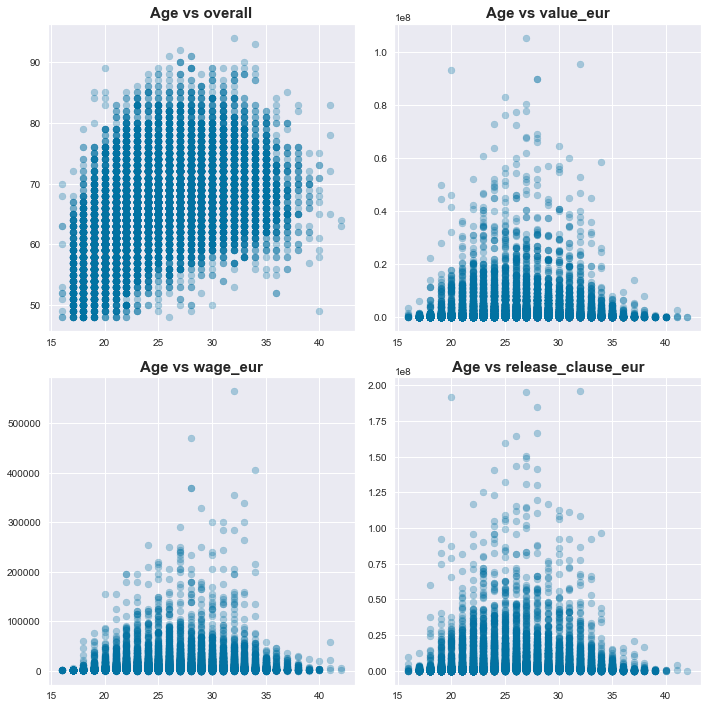

In [126]:
# columns to compare with Age

columns=['overall', 'value_eur', 'wage_eur', 'release_clause_eur']

fig, ax=plt.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    ax.scatter(fifa['age'], fifa[col], alpha=0.3)
    ax.set_title('Age vs {}'.format(col), fontsize=15, fontweight="bold")
plt.tight_layout()

- For Age vs Overall, the general trend is upward. It insuinitate that players who spent more years playing on the pitch gained more potential rating. However, the trend is moderate. Some players show higher overall ratings than many players despite being younger and vice-versa is true for some players as well. Surely, natural talent plays a role in players' development. Looking at Haaland and Mbappe, we need not ask for proof.
- When attribute 'age' is plotted against players values, wage and release clause, we have observed similar trend in all the plots. Value, wage and Release clause is higher for player who fall in age group between 21 years and 34 years with tails on both sides. This means that players value, wage and release clause in lower at the begining and end of the their career. 

### Release clause vs Value and Wage

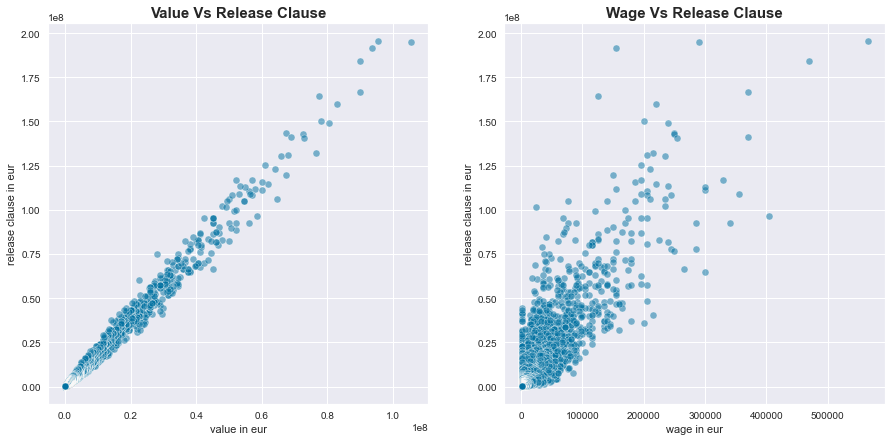

In [127]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('value_eur', 'release_clause_eur', data=fifa, alpha=0.5)
plt.xlabel('value in eur')
plt.ylabel('release clause in eur')
plt.title('value vs release clause'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,2,2)
sns.scatterplot('wage_eur', 'release_clause_eur', data=fifa, alpha=0.5)
plt.xlabel('wage in eur')
plt.ylabel('release clause in eur')
plt.title('wage vs release clause'.title(), fontsize=15, fontweight="bold");

- Players value is strongly correlated with his release clause. Player with higher value tend to have higher release clause intcluded in his contract.
- Wage also shows postive corrleation with release clause. However, it is not as strong as the one between value and release clause.
- As we go on increase value, age or release clause, the number of players falling into higher groups decreases and scatter plot appears dispersed.

## Answering Intersting Questions

Before we find answers to some interesting questions, let us first filter out players who have overall rating more than 65. 

The idea is to select players who plays periodically if not consistently in the recognised leagues. Otherwise, we will end up having unknow players from some unknown leagues.

In [128]:
players=fifa[fifa['overall']>=65]

In [129]:
print('fifa', fifa.shape)
print('players', players.shape)

fifa (18278, 90)
players (11020, 90)


### Who are the eldest player/s?

In [130]:
players[players['age']==players.age.max()]

short_name  age  height_cm  weight_kg nationality              club  \
200       G. Buffon   41        192         92       Italy          Juventus   
868          Hilton   41        180         78      Brazil   Montpellier HSC   
3706   C. Lucchetti   41        182         69   Argentina  Atlético Tucumán   
10665      F. Kippe   41        194         97      Norway     Lillestrøm SK   

       overall  potential  value_eur  wage_eur player_positions  \
200         83         83    2600000     58000               GK   
868         78         78          0     21000               CB   
3706        72         72     325000      5000               GK   
10665       65         65          0      1000               CB   

      preferred_foot  international_reputation  weak_foot  skill_moves  \
200            Right                         4          2            1   
868            Right                         2          4            3   
3706           Right                         1          3            1   
10665           Left                         1          3            2   

           work_rate  release_clause_eur team_position  pace  shooting  \
200    Medium/Medium           4300000.0           SUB   0.0       0.0   
868       Low/Medium                 NaN            CB  36.0      51.0   
3706   Medium/Medium            488000.0            GK   0.0       0.0   
10665    Medium/High                 NaN           LCB  25.0      52.0   

       passing  dribbling  defending  physic  gk_diving  gk_handling  \
200        0.0        0.0        0.0     0.0       78.0         77.0   
868       67.0       66.0       80.0    71.0        0.0          0.0   
3706       0.0        0.0        0.0     0.0       72.0         69.0   
10665     49.0       34.0       61.0    73.0        0.0          0.0   

       gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
200          74.0         80.0      33.0            91.0                  13   
868           0.0          0.0       0.0             0.0                  60   
3706         76.0         73.0      43.0            70.0                  23   
10665         0.0          0.0       0.0             0.0                  33   

       attacking_finishing  attacking_heading_accuracy  \
200                     15                          13   
868                     45                          79   
3706                    13                          23   
10665                   46                          70   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
200                         37                 17               26   
868                         74                 51               64   
3706                        34                 18               24   
10665                       56                 43               24   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
200             20                 13                  35                  28   
868             54                 48                  73                  73   
3706            27                 30                  32                  35   
10665           51                 53                  55                  49   

       movement_acceleration  movement_sprint_speed  movement_agility  \
200                       37                     30                55   
868                       35                     36                54   
3706                      40                     45                44   
10665                     24                     25                27   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
200                    80                49                56             71   
868                    70                60                55             79   
3706                   71                45                57             62   
10665                  66         

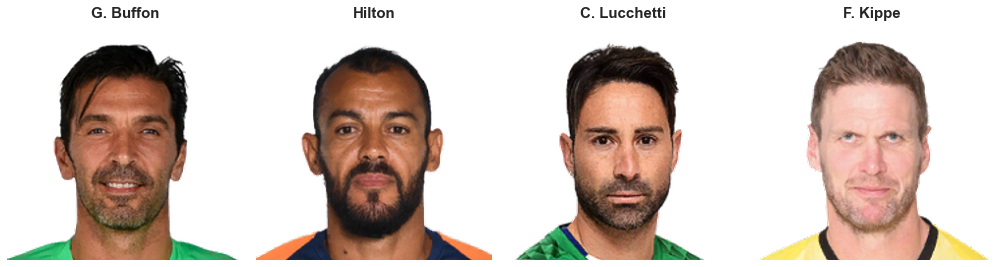

In [131]:
eldest_players=players[players['age']==players.age.max()]['short_name'].values
plot_images(eldest_players, 1,4,(14,10))

There are 4 players who are playing at the age of 41 years. And there is one famous name in the list, G. Buffon!

World cup winner Buffon is regarded as one of the best Goalkeepers in the world. He conceded only two goals in the World cup 2006. He got nominated 9 times for Ballon d’Or. Currently playing at 41 years of age makes Buffon one of the eldest players in Fifa 20.



### Who are the youngest players?

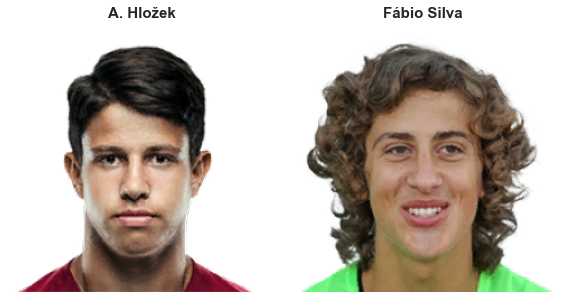

In [132]:
yongest_players=players[players['age']==players.age.min()]['short_name'].values

plot_images(yongest_players, 1,2,(8,6))

'A. Hložek' and 'Fábio Silva' are the two youngest players in the fifa. They both are playing at an age of 16 years.

### Top NexGen: Wonderkids in Football

Football has always been a sport that is heavily reliant on young talent. Many young players, even teenagers, have made their mark on the biggest stage of football, whether it's in domestic leagues or international tournaments. One of the most exciting prospects in football is the NextGen wonderkids, players who are under the age of 20 and have the potential to become superstars in the future.

These NextGen wonderkids are scouted and nurtured by some of the biggest clubs in the world, and their potential is measured by their rating in the FIFA video game series. A potential rating of 90 or higher in FIFA is considered to be exceptional and indicates that the player has the ability to become a world-class player.

Some of the most famous NextGen wonderkids in football history include Lionel Messi, who made his debut for Barcelona at the age of 16, Kylian Mbappe, who won the World Cup with France at the age of 19, and Jadon Sancho, who became one of the most expensive English players of all time at the age of 20.

Filtering out NextGen wonderkids who meet the age and potential rating criteria can be a daunting task, but it can provide valuable insights into the future of football. These players have the potential to shape the sport for years to come and can be instrumental in determining the success of their respective clubs and national teams.

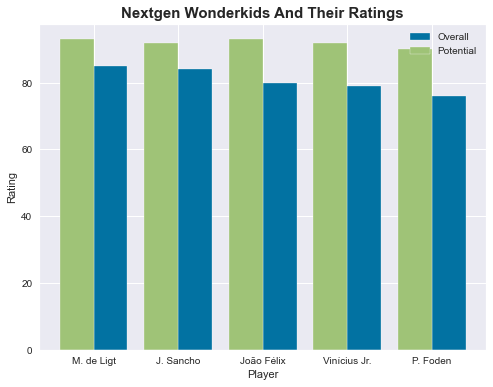

In [133]:
next_gen= players[(players['age']<20) & (players['potential']>=90)]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(next_gen['short_name'], next_gen['overall'], width=0.4, align='edge')
ax.bar(next_gen['short_name'], next_gen['potential'], width=-0.4, align='edge')

ax.set_xlabel('Player')
ax.set_ylabel('Rating')
ax.legend(['Overall', 'Potential'])
ax.set_title('NextGen Wonderkids and their Ratings'.title(), fontsize=15, fontweight="bold");


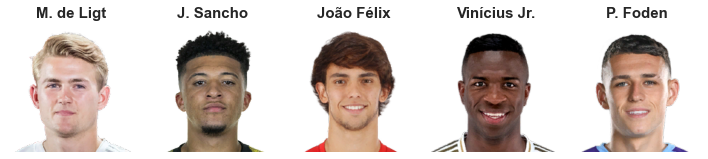

In [173]:
next_gen_players= next_gen['short_name'].values
plot_images(next_gen_players, 1,5,(10,6))

- The players listed are all under the age of 20, which highlights the focus on developing young talent in football.
- All of the players have high potential ratings, with four of them having a potential rating of 90 or above. This indicates that they have the potential to become top players in the future.
- The players represent a diverse range of nationalities, including Netherlands, England, Portugal, and Brazil.
- Juventus has the youngest player on the list, Matthijs de Ligt, who is only 19 years old but already has a high overall rating of 85.
- João Félix, who plays for Atlético Madrid, has the highest potential rating on the list at 93. He is also one of the youngest players on the list, at just 19 years old.

Despite being young and having high potential ratings, the players' current wages and values are relatively low compared to more established players in the sport. For example, the highest valued player on the list, Matthijs de Ligt, has a value of 50 million euros, which is a fraction of the value of players like Lionel Messi or Cristiano Ronaldo.

The players listed have a variety of positions, including center back, right and left midfield, center forward, striker, and attacking midfield. This indicates that young talent is being developed across all areas of the field.
Overall, these next generation wonderkids represent the future of football and are highly sought after by top clubs looking to secure their talent. It will be interesting to see how their careers develop in the coming years and if they live up to their potential.

In [135]:
players.head()

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   
3               GK          Right                         3          3   
4           LW, CF          Right                         4          4   

   skill_moves      work_rate  release_clause_eur team_position  pace  \
0            4     Medium/Low         195800000.0            RW  87.0   
1            5       High/Low          96500000.0            LW  90.0   
2            5    High/Medium         195200000.0           CAM  91.0   
3            1  Medium/Medium         164700000.0            GK   0.0   
4            4    High/Medium         184500000.0            LW  91.0   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0      92.0     92.0       96.0       39.0    66.0        0.0          0.0   
1      93.0     82.0       89.0       35.0    78.0        0.0          0.0   
2      85.0     87.0       95.0       32.0    58.0        0.0          0.0   
3       0.0      0.0        0.0        0.0     0.0       87.0         92.0   
4      83.0     86.0       94.0       35.0    66.0        0.0          0.0   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         0.0          0.0       0.0             0.0                  88   
1         0.0          0.0       0.0             0.0                  84   
2         0.0          0.0       0.0             0.0                  87   
3        78.0         89.0      52.0            90.0                  13   
4         0.0          0.0       0.0             0.0                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84     

### Who are the most valued players?

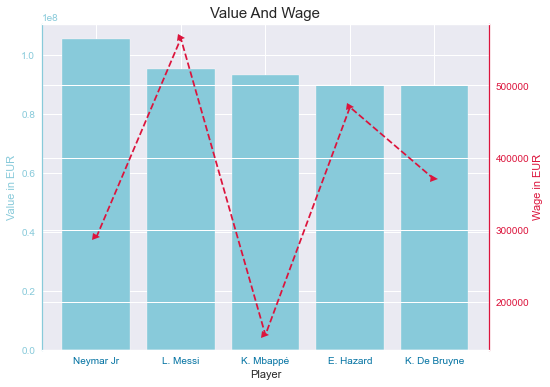

In [136]:
most_valued= players[['short_name', 'value_eur', 'wage_eur']].sort_values('value_eur', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(most_valued.short_name, most_valued.value_eur, color= 'c', label='value')
ax1.set_ylabel('Value in EUR', color='c')
ax1.tick_params(axis='y', labelcolor= 'c')
ax1.set_xticklabels(labels= most_valued.short_name)

#creating twin y axis as ax2
ax2 = ax1.twinx()

ax2.plot(most_valued.short_name, most_valued.wage_eur, c='crimson', linestyle='--', marker='>', label= 'wage')
ax2.set_ylabel('Wage in EUR', color='crimson')
ax2.tick_params(axis='y', labelcolor= 'crimson')

ax1.set_xlabel('Player')
ax1.tick_params(axis='x', labelcolor= "b")
plt.title('Value and Wage'.title(), fontsize=15)

ax2.spines['left'].set_color('c')
ax2.spines['right'].set_color('crimson');

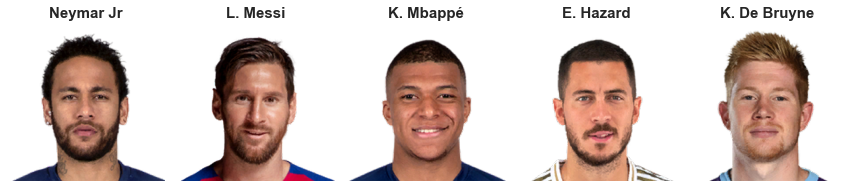

In [137]:
most_valued_players= most_valued['short_name'].values
plot_images(most_valued_players, 1,5,(12,8))

The results are in, and the most valued FIFA 20 player is none other than Neymar Jr! With a whopping value of 105.5 million euros and a weekly wage of 290,000 euros, Neymar Jr is certainly living up to his reputation as one of the best players in the world.

But that's not all - coming in at a close second is none other than Lionel Messi, valued at 95.5 million euros and earning a weekly wage of 565,000 euros. Messi is widely regarded as one of the greatest footballers of all time, and it's no surprise to see him near the top of the list.

In third place is Kylian Mbappé, the young French superstar who has taken the football world by storm. Valued at 93.5 million euros and earning a weekly wage of 155,000 euros, Mbappé is certainly one to watch for the future.

Fourth and fifth place are occupied by two of the Premier League's finest - Eden Hazard and Kevin De Bruyne. Hazard, who recently made the switch from Chelsea to Real Madrid, is valued at 90 million euros and earns a weekly wage of 470,000 euros. De Bruyne, who has been in sensational form for Manchester City, is also valued at 90 million euros but earns a slightly lower weekly wage of 370,000 euros.

It's fascinating to see the differences in value and wage among these top players. While Neymar Jr is the most valued player, he earns a lower weekly wage than Lionel Messi, who is valued slightly lower. Similarly, Kevin De Bruyne is valued the same as Eden Hazard, but earns a lower weekly wage. These differences could reflect a variety of factors, such as the players' performance on the pitch, their age, and their marketability.

One fun fact to note is that Neymar Jr's value is more than double that of his Paris Saint-Germain teammate, Kylian Mbappé. This could reflect Neymar Jr's experience and track record in the sport, as well as his marketability off the pitch.

Overall, the list of the most valued players in FIFA 20 is a fascinating glimpse into the world of professional football. These players have worked hard to achieve their success, and it's exciting to see how their careers will develop in the years to come.

### Which type of offensive players tends to get paid the most?

Offensive players are those players on the team that are primarily responsible for scoring goals and creating scoring opportunities for their team. These players typically play in positions such as:

Striker (ST): The striker is the player who is responsible for scoring goals. They play at the front of the team and are usually the most forward of the offensive players. They rely on speed, agility, and precision to shoot the ball into the goal.

Forward (F): The forward is similar to the striker, but may play a slightly different role in the team. They also work to create scoring opportunities, and are often involved in passing the ball to other offensive players.

Attacking Midfielder (CAM): The attacking midfielder plays in the middle of the field and is responsible for creating scoring opportunities for the team. They often use their technical skills, passing ability, and vision to create openings for their team.

Winger (RW/LW): The winger is a player who plays on the sides of the field and is responsible for creating chances to score goals. They use their speed and dribbling ability to move past defenders and cross the ball into the box.

Forward/Attacking Midfielder (CF): The forward/attacking midfielder, also known as a "false nine," is a position that combines the roles of the striker and the attacking midfielder. They often play behind the striker and are responsible for both creating and scoring goals.

Overall, offensive players are crucial to any football team's success, as they are responsible for creating and scoring goals, and putting pressure on the opposing team's defense.

In [138]:
offensive_pos= ['RW', 'LW', 'CAM', 'ST', 'CF', 'LS', 'RAM', 'RS', 'RF', 'LF', 'LAM']

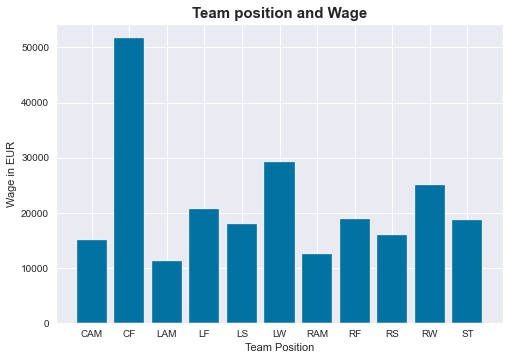

In [139]:
off_players= players[players['team_position'].isin(offensive_pos)]
off_avg= off_players.groupby('team_position')['wage_eur'].mean()
plt.bar(off_avg.keys(), off_avg.values)
plt.xlabel('Team Position')
plt.ylabel('Wage in EUR')
plt.title('Team position and Wage', fontsize=15, fontweight='bold');

After analyzing the data on player wages in FIFA, we can see that the position of center forward (CF) tends to get paid the most among offensive players, with an average wage of 51,714 euros per week. This position is responsible for leading the attack and scoring goals, so it's not surprising that they are paid a premium.

Other positions that tend to have high wages include the left wing (LW) and right wing (RW), with average wages of 29,188 and 25,052 euros per week respectively. These positions are responsible for creating chances and providing crosses for the center forward to score goals.

Interestingly, the position of striker (ST), which is traditionally considered the most important offensive position, has a lower average wage compared to center forward. The average wage for strikers is 18,705 euros per week, which is lower than the wages for CF, LW, and RW.

One fun fact is that the data shows that the position of left attacking midfielder (LAM) has the lowest average wage among offensive positions, with a weekly wage of just 11,285 euros. This position is responsible for creating chances from the left side of the field, but it seems that they are not as highly valued in terms of wages compared to other offensive positions.

Overall, this data shows that the position of center forward tends to be the most highly paid among offensive players in FIFA, which is not surprising given their role in scoring goals and leading the attack.

###  What is ideal budget to create a competitive team?

Determining the ideal budget for a competitive FIFA team depends on a variety of factors such as the level of competition you are aiming for, the player ratings and attributes you are looking for, and the market conditions at the time of purchase.

However, a general rule of thumb is to allocate the majority of your budget towards key positions such as striker, central midfielder, and center back, as these positions tend to have the most impact on the game. You may also want to consider the depth of your squad, as injuries and suspensions can occur and having quality backups can be important.

We have already filtered out players with overall rating more than 65 so the team made up of these players would be competitive. 

The overall budget to create a team would be sum of value of each player and the wage over the contract period. We will assume that each player is contracted for 5 years. Football team usually main playing 11 and secondary playing 11 which is also term as Depth of the team in football world. Hence, general strength of a football team is 22 players.

So, to find out the budget for the team, we have to consder the transfer amount (value_eur) and the weekly wage paid over the period of 5 years for each player.

If I were a manager, my favourite team formation would be 4-3-3. So the players will play in following positions:
                            
                     |_____________|       
                            GK
                RB      CB      CB      LB

                            CDM

                        RDM     LDM

                    RW      CF      LW
                      _____________
                    

In [140]:
team_positions = ['GK', 'RB', 'CB', 'LB', 'CDM', 'RDM', 'LDM', 'RW', 'CF', 'LW']

# first find out the average value and wage of player playing in each position in the team
avg_value= players.groupby('team_position')['value_eur'].mean().reset_index()
avg_wage= players.groupby('team_position')['wage_eur'].mean().reset_index()

avg_value_team= avg_value[avg_value['team_position'].isin(team_positions)]
avg_wage_team= avg_wage[avg_wage['team_position'].isin(team_positions)]

# budget: 2 *(value of main playing 11 + 4*12*5* weekly salaray)
budget_11= 2* (avg_value_team['value_eur'].sum() + 4 * 12 * 5* avg_wage_team['wage_eur'].sum()+ avg_value_team.loc[1, 'value_eur'] + 4 * 12 * 5 * avg_wage_team.loc[1, 'wage_eur'])/1000000
print('The average budget to form a competitive football team is', np.ceil(budget_11), 'million euros')

The average budget to form a competitive football team is 230.0 million euros


### Comparing Top Players

In [141]:
player_attributes=players[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning',
       'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 
       'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance',
       'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 
       'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 
       ]]

In [142]:
attributes=['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']

for attr in attributes:
    cols = [col for col in player_attributes.columns if attr in col]
    player_attributes[attr] = player_attributes[cols].mean(axis=1)
    player_attributes[attr] =player_attributes[attr].astype('int')

In [143]:
import plotly.graph_objs as go

def compare_players(player1, player2, attributes=None):
    if attributes is None:
        attributes = ['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']
        
    data = []
    
    for i, player in enumerate([player1, player2]):
        values = []
        for attr in attributes:
            values.append(player_attributes[player_attributes['short_name'] == player][attr].values[0])
            
        data.append(go.Scatterpolar(
            r=values,
            theta=attributes,
            fill='toself',
            name=player,
            line=dict(
                color=f"rgba({255*(i==0)},{255*(i==1)},{100},{1})"
            )
        ))
    
    layout = go.Layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        showlegend=True,
        legend=dict(
            x=0.1,
            y=1.1
        )
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()


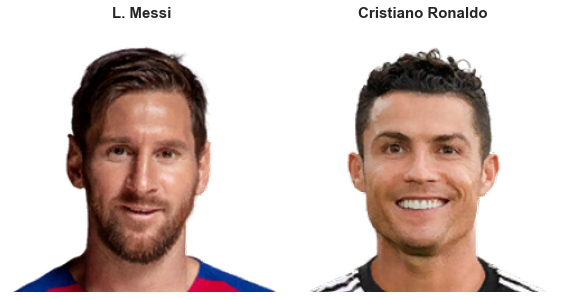

In [144]:
#sample= player_attributes[player_attributes['overall']>88].sample(2)['short_name'].values
plot_images(['L. Messi', 'Cristiano Ronaldo'], 1, 2, (8,6))
compare_players('L. Messi','Cristiano Ronaldo')

### Who earn more: Left footed or Right footed player?

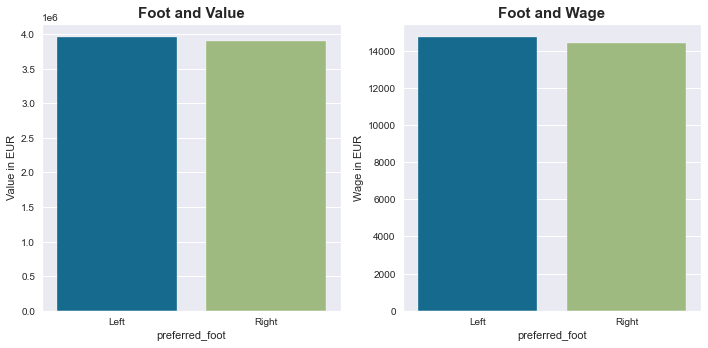

In [145]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
foot_value= players.groupby('preferred_foot')['value_eur'].mean()
sns.barplot(foot_value.keys(), foot_value.values)
plt.ylabel('Value in EUR')
plt.title('Foot and Value', fontsize=15, fontweight='bold')

plt.subplot(1,2,2)
foot_wage= players.groupby('preferred_foot')['wage_eur'].mean()
sns.barplot(foot_wage.keys(), foot_wage.values)
plt.ylabel('Wage in EUR')
plt.title('Foot and Wage', fontsize=15, fontweight='bold')
plt.tight_layout();

From the given analysis of the FIFA 20 dataset, we can see that on average, players with a preferred foot of left have a slightly higher market value and wage as compared to the players with a preferred foot of right. However, the difference between the two is not significant enough to draw a concrete conclusion.

Some interesting observations can be drawn from this analysis. For instance, it is believed that left-footed players have an advantage on the field as they are less common and therefore harder for defenders to anticipate their movements. As a result, some left-footed players have become legendary in football history, including Lionel Messi, Diego Maradona, and Gareth Bale.

Additionally, it is essential to note that left-footed players tend to have a higher level of creativity, which may explain why they are valued more in the transfer market. A study by PLOS ONE found that left-footed players tend to be more versatile and better at coming up with unique solutions to problems on the field, contributing to their overall value.

Moreover, it is also interesting to note that some players are ambidextrous, meaning they can use both feet equally well. For instance, Cristiano Ronaldo is known for his ability to use both his left and right foot with incredible precision, contributing to his success as a footballer.

In conclusion, the analysis of the FIFA 20 dataset shows that left-footed players may have a slight advantage in terms of market value and wage. However, this difference is not significant enough to draw concrete conclusions. 

Furthermore, we will run the hypothesis test to check whether there is any difference in market value/wage between right footed and left footed players

In [170]:
import pandas as pd
from scipy import stats

# Define null and alternative hypotheses
null_hypothesis = "There is no difference in market value/wage between right footed and left footed players"
alternative_hypothesis = "There is a difference in market value/wage between right footed and left footed players"

right_footed = players[players['preferred_foot'] == 'Right']
left_footed = players[players['preferred_foot'] == 'Left']

# significance level
alpha = 0.05

# t-test
value_ttest = stats.ttest_ind(right_footed['value_eur'], left_footed['value_eur'])
wage_ttest = stats.ttest_ind(right_footed['wage_eur'], left_footed['wage_eur'])

# results
print('Market value:')
print('Null hypothesis: {}'.format(null_hypothesis))
print('Alternative hypothesis: {}'.format(alternative_hypothesis))
print('t-statistic = {:.2f}, p-value = {:.4f}'.format(value_ttest.statistic, value_ttest.pvalue))
if value_ttest.pvalue < alpha:
    print('We reject the null hypothesis at the {} significance level.'.format(alpha))
else:
    print('We fail to reject the null hypothesis at the {} significance level.'.format(alpha))

print('\n') 
   
print('Wage:')
print('Null hypothesis: {}'.format(null_hypothesis))
print('Alternative hypothesis: {}'.format(alternative_hypothesis))
print('t-statistic = {:.2f}, p-value = {:.4f}'.format(wage_ttest.statistic, wage_ttest.pvalue))
if wage_ttest.pvalue < alpha:
    print('We reject the null hypothesis at the {} significance level.'.format(alpha))
else:
    print('We fail to reject the null hypothesis at the {} significance level.'.format(alpha))


Market value:
Null hypothesis: There is no difference in market value/wage between right footed and left footed players
Alternative hypothesis: There is a difference in market value/wage between right footed and left footed players
t-statistic = -0.34, p-value = 0.7344
We fail to reject the null hypothesis at the 0.05 significance level.


Wage:
Null hypothesis: There is no difference in market value/wage between right footed and left footed players
Alternative hypothesis: There is a difference in market value/wage between right footed and left footed players
t-statistic = -0.48, p-value = 0.6336
We fail to reject the null hypothesis at the 0.05 significance level.


Based on the analysis, it appears that there is no significant difference in market value or wage between right footed and left footed players in the FIFA 22 dataset. This means that a player's preferred foot doesn't have a major impact on their value or salary as a footballer, which is good news for all the ambidextrous players out there!

# Data Preprocessing

In [149]:
train_fifa=fifa[fifa['overall']>80]

### Imputing Missing Values

In [150]:
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import KNN, IterativeImputer

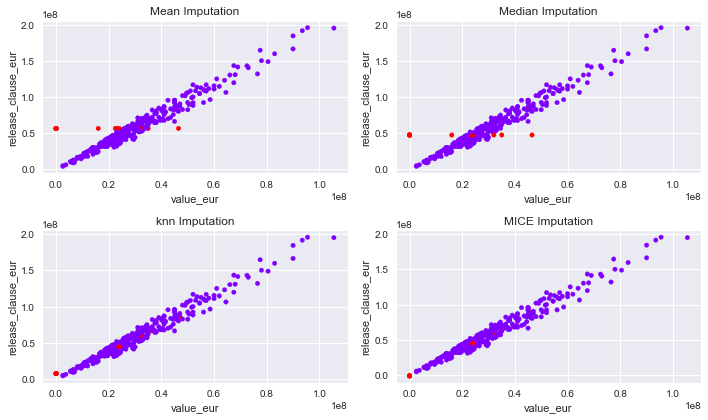

In [151]:
# filtering out numerical data
fifa_cat_list=list(train_fifa.select_dtypes('object').columns)
fifa_num=train_fifa.drop(columns=fifa_cat_list)

# mean imputation
df_mean = fifa_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

# median imputation
df_median =fifa_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

# KNN imputation
df_knn = fifa_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

# MICE imputation
df_mice= fifa_num.copy()
mice_imputer = IterativeImputer()
df_mice.iloc[:,:]= mice_imputer.fit_transform(df_mice)

# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))

nullity = train_fifa["release_clause_eur"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "value_eur", y = "release_clause_eur", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    
    plt.tight_layout();

The graphs are plotted with Fare values on x-axis and Age on y-axis. Imputed values are represented by red dots. 
- Mean and Median imputation techniques fill constant values so, we see the imputed missing values along the straight horizontal line.
- As KNN and MICE Imputation techniques are distance based, values are imputed based on nearest distance to the other observations. Hence, they give results close to the original data. 

Both KNN and MICE show almost the same results. KNN imputation is typically faster and computationally less complex than MICE imputation, which involves multiple imputations and model fitting. KNN imputation involves calculating distances between observations and selecting the nearest neighbors for imputation, which is computationally less intensive.

In [152]:
fifa_num_imputed=df_knn.copy()

## Correlation

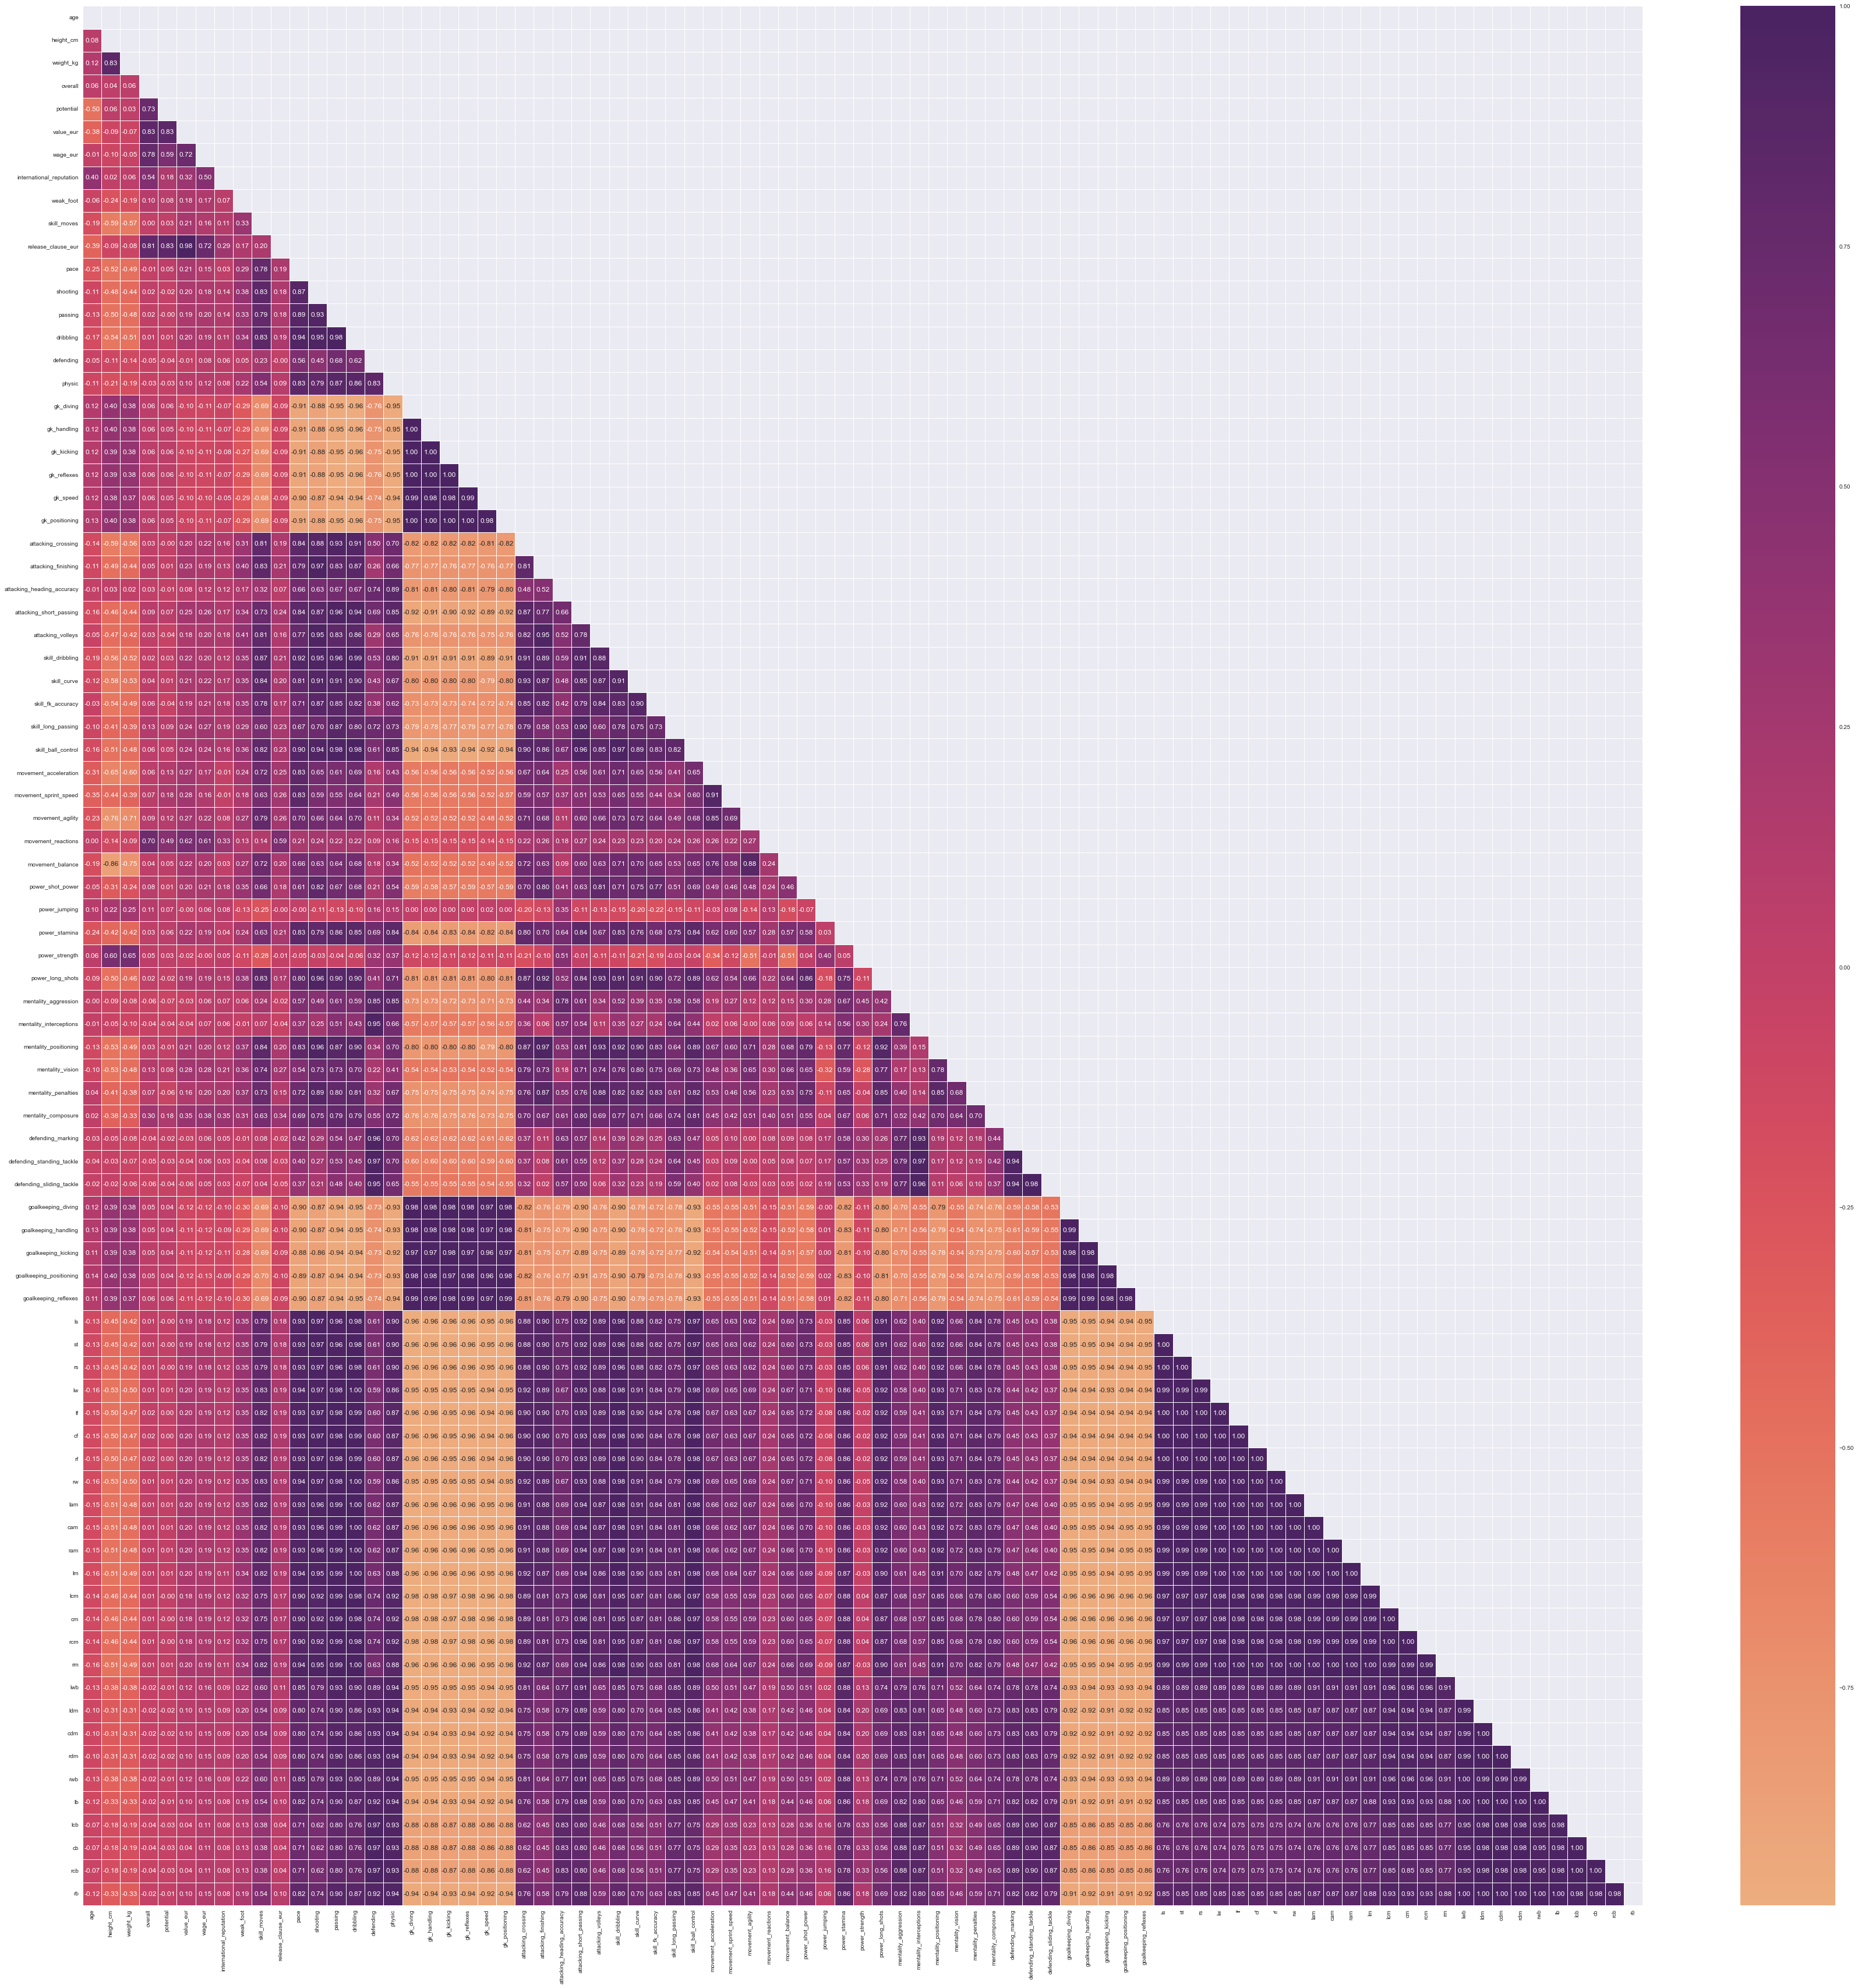

In [153]:
#correlation
corr= fifa_num_imputed.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(60,60))
sns.heatmap(fifa_num_imputed.corr(), mask=mask, center=0, cmap='flare', linewidths=1, annot=True, fmt='.2f');

We can clearly see there are multiple attributes which are strongly correlated with each other. We will get rid of it as they are conveying same information as their related attributes. 

## Scaling

In [154]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
fifa_scaled=scaler.fit_transform(fifa_num_imputed)

min_max=MinMaxScaler()
fifa_min_max=min_max.fit_transform(fifa_num_imputed)

## PCA

In [155]:
from sklearn.decomposition import PCA
pca=PCA()
fifa_pca=pca.fit_transform(fifa_scaled)
pca_comp=PCA(n_components=2)
fifa_pca=pca_comp.fit_transform(fifa_scaled)
#concatenating with original dataset
col_names=['PC1', 'PC2']
new_fifa=pd.concat([fifa_num_imputed.reset_index(drop=True), pd.DataFrame(fifa_pca, columns=col_names)], axis=1)
new_fifa['player_name']=fifa['short_name']
new_fifa.head(3)

age  height_cm  weight_kg  overall  potential    value_eur  wage_eur  \
0  32.0      170.0       72.0     94.0       94.0   95500000.0  565000.0   
1  34.0      187.0       83.0     93.0       93.0   58500000.0  405000.0   
2  27.0      175.0       68.0     92.0       92.0  105500000.0  290000.0   

   international_reputation  weak_foot  skill_moves  release_clause_eur  pace  \
0                       5.0        4.0          4.0         195800000.0  87.0   
1                       5.0        4.0          5.0          96500000.0  90.0   
2                       5.0        5.0          5.0         195200000.0  91.0   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0      92.0     92.0       96.0       39.0    66.0        0.0          0.0   
1      93.0     82.0       89.0       35.0    78.0        0.0          0.0   
2      85.0     87.0       95.0       32.0    58.0        0.0          0.0   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         0.0          0.0       0.0             0.0                88.0   
1         0.0          0.0       0.0             0.0                84.0   
2         0.0          0.0       0.0             0.0                87.0   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                 95.0                        70.0                     92.0   
1                 94.0                        89.0                     83.0   
2                 87.0                        62.0                     87.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0               88.0             97.0         93.0               94.0   
1               87.0             89.0         81.0               76.0   
2               87.0             96.0         88.0               87.0   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                92.0                96.0                   91.0   
1                77.0                92.0                   89.0   
2                81.0                95.0                   94.0   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                   84.0              93.0                95.0   
1                   91.0              87.0                96.0   
2                   89.0              96.0                92.0   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0              95.0              86.0           68.0           75.0   
1              71.0              95.0           95.0           85.0   
2              84.0              80.0           61.0           81.0   

   power_strength  power_long_shots  mentality_aggression  \
0            68.0              94.0                  48.0   
1            78.0              93.0                  63.0   
2            49.0              84.0                  51.0   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                     40.0                   94.0              94.0   
1                     29.0                   95.0              82.0   
2                     36.0                   87.0              90.0   

   mentality_penalties  mentality_composure  defending_marking  \
0                 75.0                 96.0               33.0   
1                 85.0                 95.0               28.0   
2                 90.0                 94.0               27.0   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                       37.0                      26.0                 6.0   
1                       32.0                      24.0                 7.0   
2                       26.0                      29.0                 9.0   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                  11.0                 15.0                     14.0   
1                  11.0                 15.0                     14.0

# Clustering Model Development

In [156]:
from sklearn.cluster import KMeans

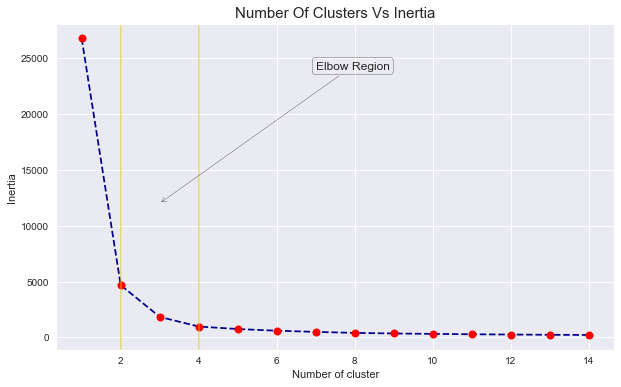

In [157]:
wcss=[]

for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(fifa_pca)
    inertia=kmeans.inertia_
    wcss.append(inertia)

#plotting graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss, color='darkblue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.axvline(2, alpha=0.5, color='y')
plt.axvline(4, alpha=0.5, color='y')
plt.annotate('Elbow Region', (3, 12000), (7, 24000),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Number of clusters vs Inertia'.title(), fontsize=15);

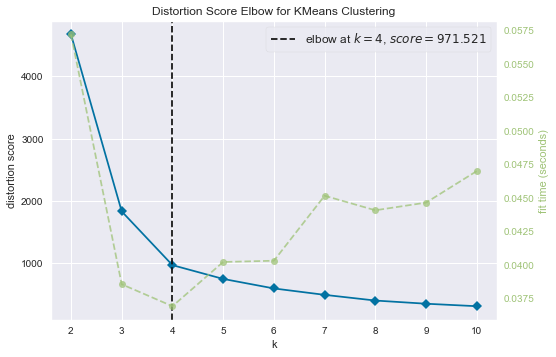

In [158]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(fifa_pca) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png');

We have got a visual where Elbow can be. The bend occurs at clusters 2. But the wcss becomes more stable after clusters 4. Although, this plot gives us better understanding of what number of clusters are suitble for the dataset, we will still try out model with 2, 3 and 4 clusters respectively. To avoid repeating the code, we will create a function which takes number of clusters as argument and returns us the clustered plot. It is as follows:

In [159]:
def plot_clusters(num_clusters):
    kmeans=KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(fifa_pca)
    #Adding labels to new_fifa dataframe
    new_fifa['labels']=kmeans.labels_

    sub_data=new_fifa[new_fifa['overall']>80]
    plt.figure(figsize=(20,15))
    sns.scatterplot('PC1', 'PC2', hue='labels', palette='tab10', data=sub_data)

    for index, row in new_fifa.iterrows():
        if row['overall']>85:
            plt.annotate(row['player_name'], xy=(row['PC1'], row['PC2']), xytext=(row['PC1']+1, row['PC2']+1), textcoords='offset points',
                ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7), 
                arrowprops=None)

In [160]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [161]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.8205592508416951
For n_clusters = 3 The average silhouette_score is : 0.5741531227815673
For n_clusters = 4 The average silhouette_score is : 0.5657888705441513
For n_clusters = 5 The average silhouette_score is : 0.5182819499046362
For n_clusters = 6 The average silhouette_score is : 0.4701672026353291


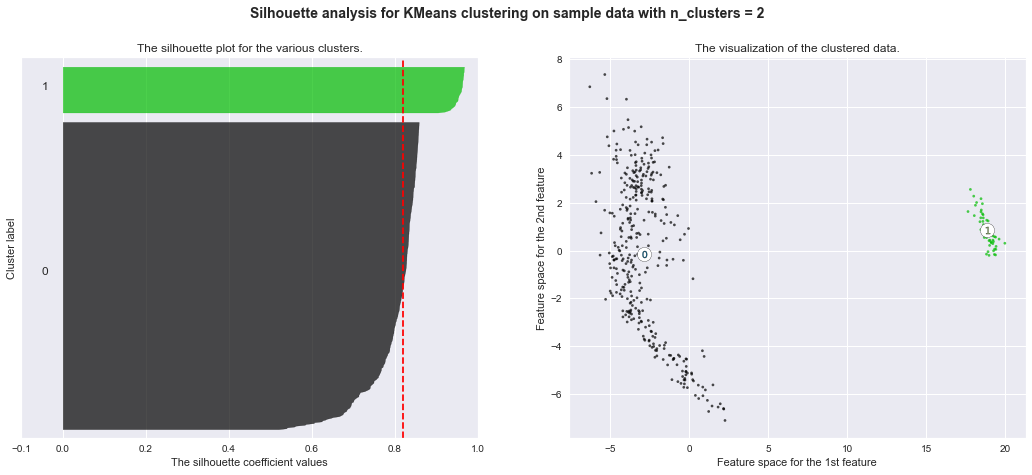

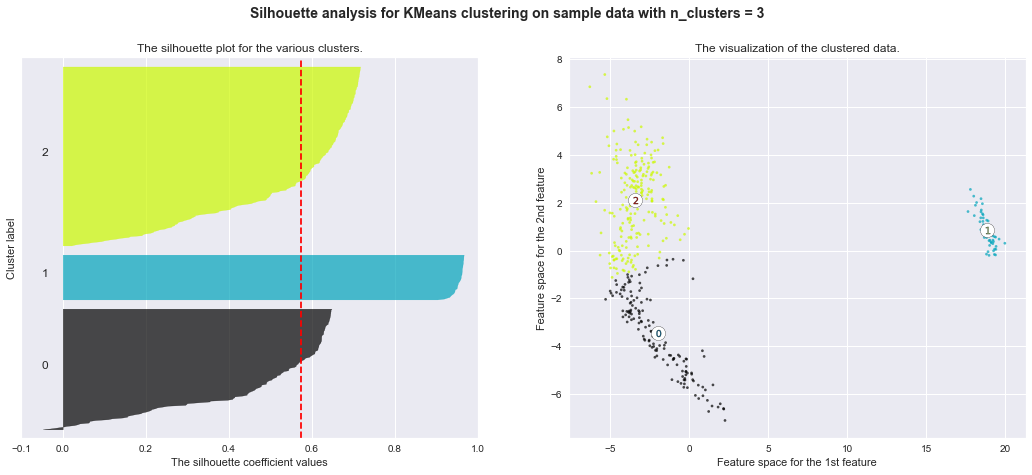

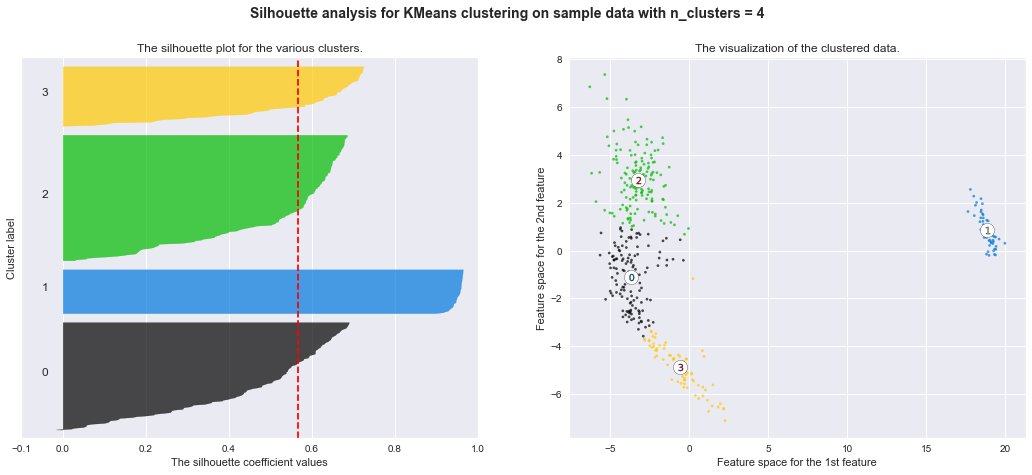

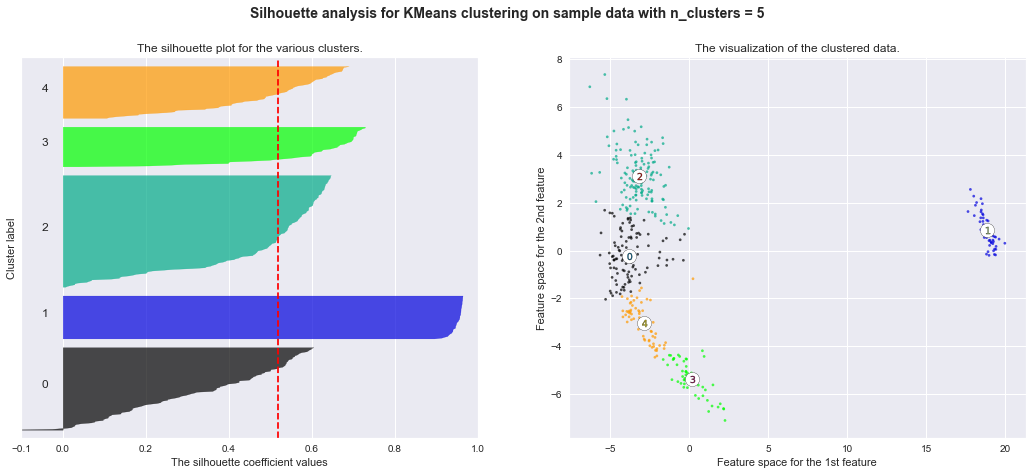

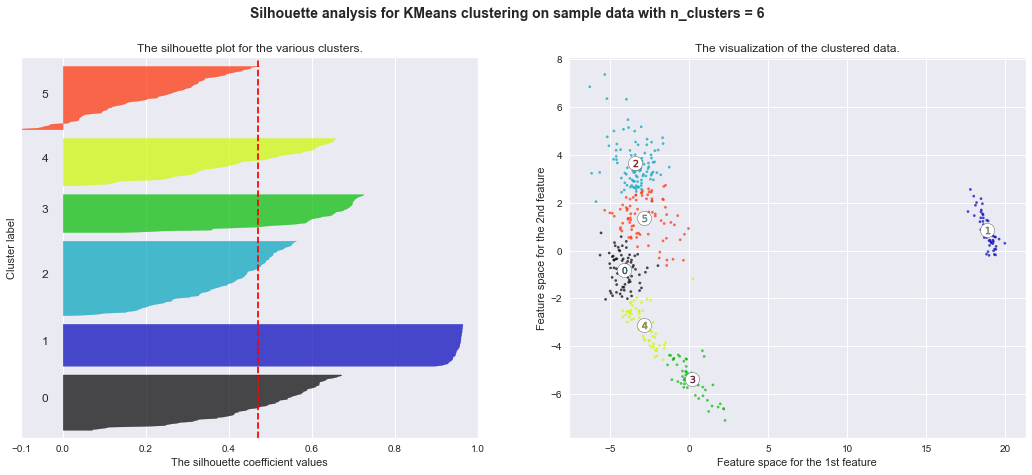

In [162]:
'''the code is inspired and edited from sklearn official page.
link: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=The%20silhouette%20plot%20displays%20a,like%20number%20of%20clusters%20visually.
'''

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(fifa_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(fifa_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(fifa_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fifa_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    new_fifa['PC1'], new_fifa['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the silhouette scores obtained for different values of n_clusters, we can observe that the clustering with 2 clusters has the highest silhouette score of 0.686, indicating that the data points are well matched to their own clusters and poorly matched to neighboring clusters. On the other hand, the clustering with 3 or more clusters has lower silhouette scores, indicating that the data points are overlapping or are not well-matched to their own clusters.

It is important to note that the silhouette score alone may not provide a complete picture of the quality of the clustering. In some cases, a lower silhouette score may still correspond to good clustering, especially when the clusters are well-separated and clearly distinct from each other.

In the current case, the silhouette score for 4 clusters is relatively low at 0.266, but the clustering appears to be good from the visualization of the data points. This could be due to the fact that some of the clusters have a smaller number of data points, leading to lower silhouette scores. Additionally, the data points within a cluster may be more densely packed, resulting in a lower silhouette score, but still indicating good clustering

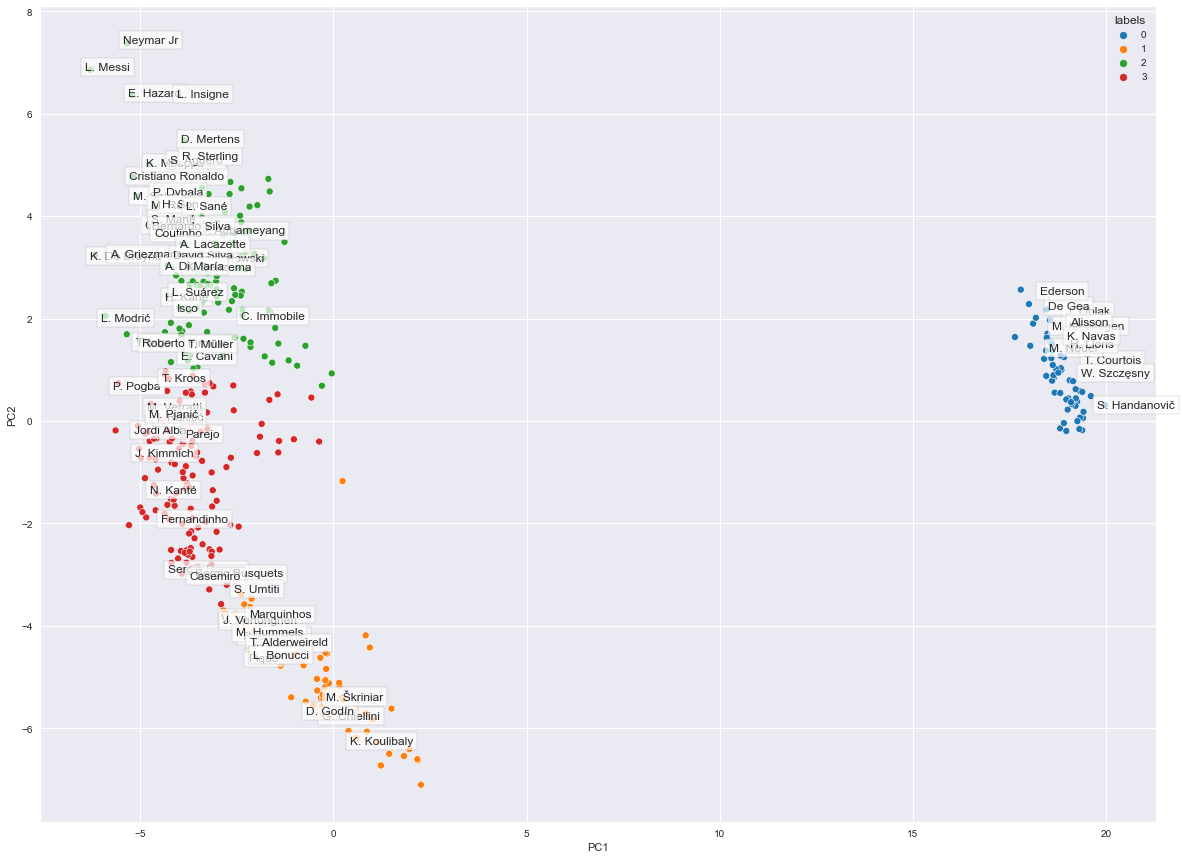

In [163]:
plot_clusters(4)

The model appears to be working well with 4 clusters. The clusters are distinguished with the help of colors. Upon analysing, we can observe following points:

- Green cluster represents strikers
- Red cluster represents Midfielders
- Orange cluster represents Defenders
- Blue cluster represents Goalkeepers